In [222]:
import pandas as pd
import numpy as np
import datetime as dt

power_consumption =  pd.read_csv('data/household_power_consumption.txt',sep=';')

/tmp/ipykernel_8756/1126089612.py:5: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  power_consumption =  pd.read_csv('data/household_power_consumption.txt',sep=';')


In [223]:
power_consumption.shape

(2075259, 9)

In [224]:
# So we have 2 075 259 recording with 9 columns. Let see the top and the tail of csv : 
power_consumption.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [225]:
#We describe the datas : 
power_consumption.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [226]:
# First we see what are the types.
power_consumption.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [227]:
# All are object, we are going to convert them into float number but first we verify missing values : 
power_consumption.isnull().all()

Date                     False
Time                     False
Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3           False
dtype: bool

In [228]:
# Great ! not missing values so now we convert them into float : 
power_consumption.Sub_metering_1.astype('float')

ValueError: could not convert string to float: '?'

In [229]:
# Too fast.. searching for '?' : 
power_consumption.loc[power_consumption.Sub_metering_1=='?']

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,?,?,?,?,?,?,NaN
1990186,28/9/2010,19:10:00,?,?,?,?,?,?,NaN
1990187,28/9/2010,19:11:00,?,?,?,?,?,?,NaN
1990188,28/9/2010,19:12:00,?,?,?,?,?,?,NaN


In [230]:
# Ok as the third metric, we will modify '?' into NaN :
power_consumption_correct_fill = power_consumption.replace('?',np.NaN)
power_consumption_ready =  power_consumption_correct_fill.astype({'Global_active_power' : 'float',
                                                                  'Global_reactive_power' : 'float',
                                                                  'Voltage' : 'float',
                                                                  'Global_intensity' : 'float',
                                                                  'Sub_metering_1' : 'float',
                                                                  'Sub_metering_2' : 'float'})

# Don't forget to convert the Date too ! 
power_consumption_ready.Date = pd.to_datetime(power_consumption_ready.Date)
power_consumption_ready

/tmp/ipykernel_8756/3474242104.py:11: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  power_consumption_ready.Date = pd.to_datetime(power_consumption_ready.Date)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,2010-11-26,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [231]:
# Now we can have a nice overview of our dataset : 
power_consumption_ready.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [244]:
# All the values (in Wh / A) are very little because it's for 1 minute, we need to sum them for having total consumption value for 1 day : 

# We group the data by days : 

power_consumption_final = power_consumption_ready.groupby(["Date"]).sum()
power_consumption_final['Voltage'] = power_consumption_ready.groupby(["Date"]).Voltage.mean()
power_consumption_final = power_consumption_final.reset_index()
power_consumption_final

/tmp/ipykernel_8756/1077932180.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  power_consumption_final = power_consumption_ready.groupby(["Date"]).sum()


,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,236.243763,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,240.087028,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,241.231694,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,241.999313,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,242.308062,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...,...
1437,2010-12-07,1109.574,285.912,240.218646,4892.0,1724.0,646.0,6444.0
1438,2010-12-08,529.698,169.098,240.794931,2338.2,0.0,514.0,3982.0
1439,2010-12-09,1612.092,201.358,241.619722,6848.2,1805.0,2080.0,8891.0
1440,2010-12-10,1579.692,170.268,240.260674,6741.2,1104.0,780.0,9812.0


In [245]:
# First we are going to do a very global analysis by years : 
Metrics_by_year = power_consumption_final.groupby(power_consumption_final.Date.dt.year)['Global_active_power',
                                                                                                    'Global_reactive_power',
                                                                                                    'Voltage','Global_intensity',
                                                                                                    'Sub_metering_1',
                                                                                                    'Sub_metering_2',
                                                                                                    'Sub_metering_3'].agg([min,max,'mean'])
Metrics_by_year
# Very nice dataframe, now we can work on it to display the datas : 

/tmp/ipykernel_8756/1817573264.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Metrics_by_year = power_consumption_final.groupby(power_consumption_final.Date.dt.year)['Global_active_power',


Global_active_power                        Global_reactive_power  \
                     min       max         mean                   min   
Date                                                                    
2006            1209.176  4773.386  2613.330125                34.922   
2007               0.000  4029.722  1596.460784                 0.000   
2008             250.298  3405.324  1543.423754                83.248   
2009               0.000  3317.820  1540.589584                 0.000   
2010               0.000  2903.014  1470.591218                 0.000   

                              Voltage                          \
          max        mean         min         max        mean   
Date                                                            
2006  311.928  180.589750  236.243763  243.767361  241.205507   
2007  325.082  167.741742  231.088229  243.557090  239.362067   
2008  392.272  168.593820  234.152208  244.954757  240.626810   
2009  417.834  187.686921  231.142972  247.435007  241.897102   
2010  327.446  179.392018  235.989111  246.379597  241.521838   

     Global_intensity  ...               Sub_metering_1                        \
                  min  ...          mean            min      max         mean   
Date                   ...                                                      
2006           5180.8  ...  11037.175000            0.0   6620.0  1716.250000   
2007              0.0  ...   6809.567123            0.0  10346.0  1760.405479   
2008           1164.0  ...   6553.165027            0.0   7893.0  1597.770492   
2009              0.0  ...   6505.821918            0.0  11178.0  1623.717808   
2010              0.0  ...   6207.286061            0.0  10932.0  1368.745455   

     Sub_metering_2                       Sub_metering_3           \
                min      max         mean            min      max   
Date                                                                
2006          314.0   7891.0  3044.500000         4926.0  14979.0   
2007            0.0  12109.0  2340.712329            0.0  19509.0   
2008          217.0  10713.0  1808.483607         1436.0  17519.0   
2009            0.0  10477.0  1622.315068            0.0  19409.0   
2010            0.0  11193.0  1526.996970            0.0  23743.0   

                    
              mean  
Date                
2006  10184.437500  
2007   8281.753425  
2008   8686.303279  
2009   9744.701370  
2010  10040.524242  

[5 rows x 21 columns]

<AxesSubplot: xlabel='Date'>

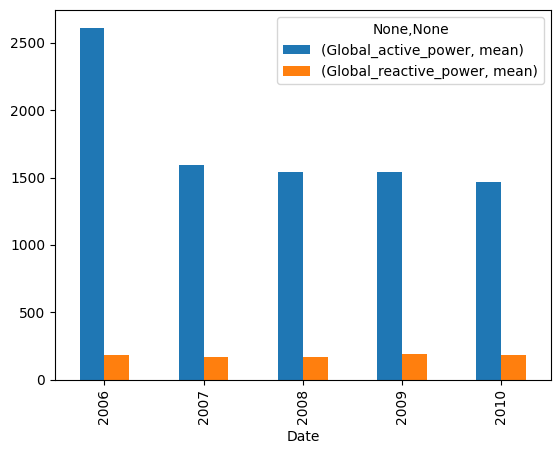

In [246]:
Mean_metrics_by_year = Metrics_by_year.iloc[:,[2,5,8,11,14,17,20]]
Global_Power_by_year = Mean_metrics_by_year.iloc[:,:2]
Global_Power_by_year.plot(kind='bar')

<AxesSubplot: title={'center': 'Sub_meterings for differents Years'}, xlabel='Date', ylabel='Power Consumption Wh'>

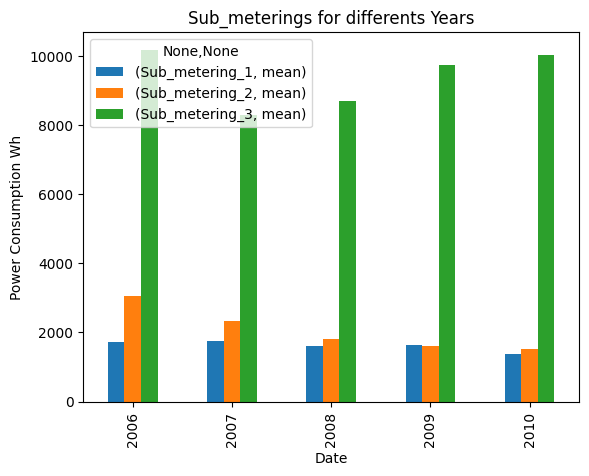

In [247]:
Sub_meterings = Mean_metrics_by_year.loc[:,['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
Sub_meterings.plot(kind='bar',
                   title='Sub_meterings for differents Years',
                   ylabel='Power Consumption Wh')

<AxesSubplot: title={'center': 'Mean Voltage for the diffents years'}, xlabel='Date', ylabel='Voltage (V)'>

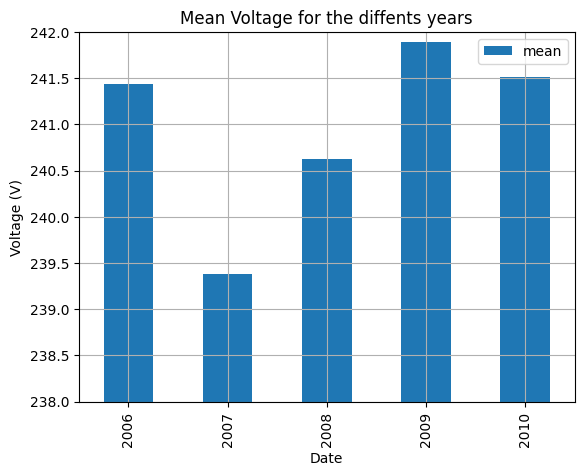

In [ ]:
min_voltage = int(Mean_metrics_by_year.Voltage.min())
max_voltage = int(Mean_metrics_by_year.Voltage.max())
sigma = int(Mean_metrics_by_year.Voltage.std())
Mean_metrics_by_year.Voltage.plot(kind="bar",
                                  grid=True,
                                  ylim=(min_voltage - sigma, max_voltage + sigma),
                                  title = 'Mean Voltage for the diffents years',
                                  ylabel='Voltage (V)')

<AxesSubplot: title={'center': 'Mean Current for the diffents years'}, xlabel='Date', ylabel='Intensity (A)'>

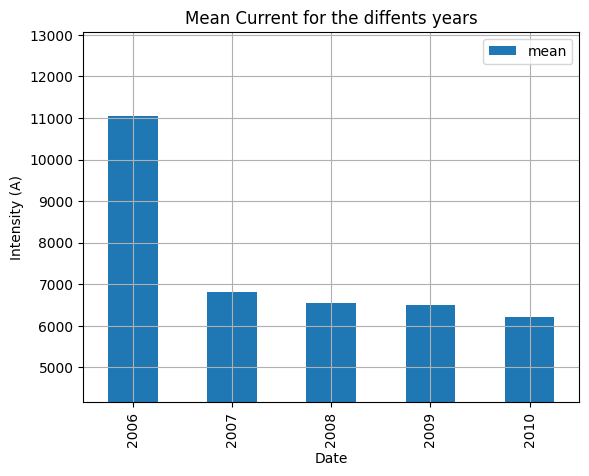

In [248]:
min_current = int(Mean_metrics_by_year.Global_intensity.min())
max_current = int(Mean_metrics_by_year.Global_intensity.max())
sigma = int(Mean_metrics_by_year.Global_intensity.std())
Mean_metrics_by_year.Global_intensity.plot(kind="bar",
                                  grid=True,
                                  ylim=(min_current - sigma, max_current + sigma),
                                  title = 'Mean Current for the diffents years',
                                  ylabel='Intensity (A)')

In [249]:
# Conclusion : 
# I must improve how to deal with missing values. Instead of replacing them by Nan Values
# I could have group my datas by months and by days not only by years. 
